In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_table = pd.read_csv('../../data/old/final_table_proposal.csv')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None) 
display(final_table.head()) 
print("Rows:",len(final_table))
print("Columns: ",len(final_table.columns))

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit,id_user,id_vehicle,position,user_category,injury_severity,sex,trip_purpose,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,used_gloves,used_gloves_and_airbag,used_other,number_vehicle,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport,impact_score,id_vehicle_other,number_vehicle_other,direction_of_travel_other,vehicle_category_other,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,number_occupants_in_public_transport_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1.0,2,0,1,30,203851184,155680557.0,1,1,4,1,5,-1,-1,-1,driver,45.0,0,1,0,0,0,0,0,0,A01,1.0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1.0,2,0,1,50,203851182,155680556.0,1,1,1,2,9,-1,-1,-1,driver,26.0,1,0,0,0,0,0,0,0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1.0,2,0,1,50,203851183,NaN,10,3,3,1,9,2,3,1,pedestrian,26.0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155680556.0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,0,0,0,1,0,0
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1.0,2,5,1,50,203851180,155680554.0,1,1,3,1,0,0,0,-1,driver,36.0,0,1,0,0,0,1,0,0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,155680555.0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,0,0,0,1,0,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1.0,2,5,1,50,203851181,155680555.0,1,1,1,2,0,0,0,-1,driver,39.0,1,0,0,0,0,0,0,0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,155680554.0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,0,0,0,1,0,1


Rows: 125789
Columns:  81


In [3]:
# First, look at columns regarding circumstances and persons
cols_general = final_table.iloc[:, 29:54]
display(cols_general.head())

,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit,id_user,id_vehicle,position,user_category,injury_severity,sex,trip_purpose,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,used_gloves,used_gloves_and_airbag,used_other
0,-1.0,2,0,1,30,203851184,155680557.0,1,1,4,1,5,-1,-1,-1,driver,45.0,0,1,0,0,0,0,0,0
1,-1.0,2,0,1,50,203851182,155680556.0,1,1,1,2,9,-1,-1,-1,driver,26.0,1,0,0,0,0,0,0,0
2,-1.0,2,0,1,50,203851183,NaN,10,3,3,1,9,2,3,1,pedestrian,26.0,0,0,0,0,0,0,0,0
3,-1.0,2,5,1,50,203851180,155680554.0,1,1,3,1,0,0,0,-1,driver,36.0,0,1,0,0,0,1,0,0
4,-1.0,2,5,1,50,203851181,155680555.0,1,1,1,2,0,0,0,-1,driver,39.0,1,0,0,0,0,0,0,0


In [4]:
info = pd.DataFrame({
    'Column': cols_general.columns,
    'Data Type': [cols_general[col].dtype for col in cols_general.columns],
    'Missing %': [f"{cols_general[col].isna().sum() / len(cols_general) * 100}%" for col in cols_general.columns],
    'Unique Values': [cols_general[col].nunique() for col in cols_general.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,carriageway_width,float64,0.0%,103
1,pavement_condition,int64,0.0%,10
2,infrastructure,int64,0.0%,11
3,accident_situation,int64,0.0%,8
4,speed_limit,int64,0.0%,21
5,id_user,int64,0.0%,125789
6,id_vehicle,float64,7.569024318501618%,93482
7,position,int64,0.0%,11
8,user_category,int64,0.0%,3
9,injury_severity,int64,0.0%,5


In [6]:
# Drop columns
final_table.drop([
    'carriageway_width',
    'id_vehicle',
    'id_user',
    'trip_purpose', # impossible to tell from a neutral perspective
    'used_gloves',
    'used_gloves_and_airbag',
    'used_other'
    ], axis=1, inplace=True)

In [14]:
cols_of_interest = cols_general.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

pavement_condition:
 1    99717
 2    24735
 9      456
 7      240
 3      203
 5      158
 8      147
 6       74
 4       51
-1        8
Name: pavement_condition, dtype: int64

infrastructure:
 0    105918
 5      6367
 9      4366
 2      2257
 1      1554
 3      1502
 6      1325
 8      1008
-1       944
 4       425
 7       123
Name: infrastructure, dtype: int64

accident_situation:
 1    107860
 3      6657
 8      3980
 5      2721
 4      2308
 6      1526
 2       730
-1         7
Name: accident_situation, dtype: int64

speed_limit:
 50     55854
 30     19399
 80     16858
 90     11797
 70      9854
 110     5469
 130     3439
-1       2150
 20       369
 60       283
 40       121
 25       115
 45        26
 100       24
 10        11
 15         6
 75         3
 31         3
 65         3
 23         3
 35         2
Name: speed_limit, dtype: int64

position:
 1     93440
 2     14060
 10     9521
 3      2420
 4      2271
 9      1308
 7      1218
 5       764
 8     

Ideas:
Drop pedestiran_action and pedestrian_location, 

Drop -1 values for injury_severity, sex, position, accident_situation, infrastructure, pavement condition

What is the -1 for Speed_limit? Is it none or unknown?

In [16]:
for col in ['injury_severity', 'sex', 'position', 'accident_situation', 'infrastructure', 'pavement_condition']:
    final_table = final_table[final_table[col]!=-1]

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

pavement_condition:
1    97004
2    24106
9      452
7      239
3      202
5      155
8      146
6       74
4       50
Name: pavement_condition, dtype: int64

infrastructure:
0    103868
5      6267
9      4277
2      2214
1      1513
3      1486
6      1264
8       994
4       423
7       122
Name: infrastructure, dtype: int64

accident_situation:
1    105347
3      6622
8      3891
5      2331
4      2236
6      1279
2       722
Name: accident_situation, dtype: int64

speed_limit:
 50     54222
 30     18311
 80     16753
 90     11640
 70      9685
 110     5380
 130     3415
-1       2102
 20       345
 60       275
 40       121
 25       101
 45        26
 100       24
 10        11
 15         6
 75         3
 31         3
 23         3
 65         2
Name: speed_limit, dtype: int64

position:
1     90322
2     13999
10     9395
3      2403
4      2259
9      1307
7      1214
5       756
8       572
6       201
Name: position, dtype: int64

user_category:
1    90344
2    22689
3 

count    123191.000000
mean         38.747977
std          19.099389
min           0.000000
25%          23.000000
50%          35.000000
75%          52.000000
max         110.000000
Name: age, dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

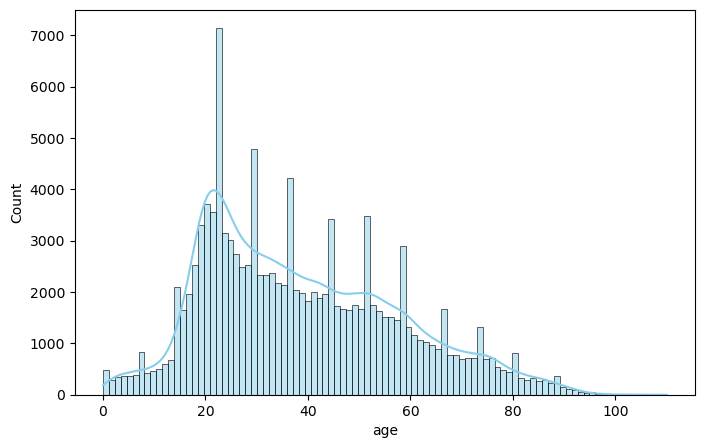

In [7]:
# Look at column "Age" in-depth
print(final_table['age'].describe())

plt.figure(figsize=(8,5))
sns.histplot(final_table['age'], kde=True, color='skyblue')

Number of NaNs:  0.0
count    125789.000000
mean         38.731232
std          19.096239
min           0.000000
25%          23.000000
50%          35.000000
75%          52.000000
max         110.000000
Name: age, dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

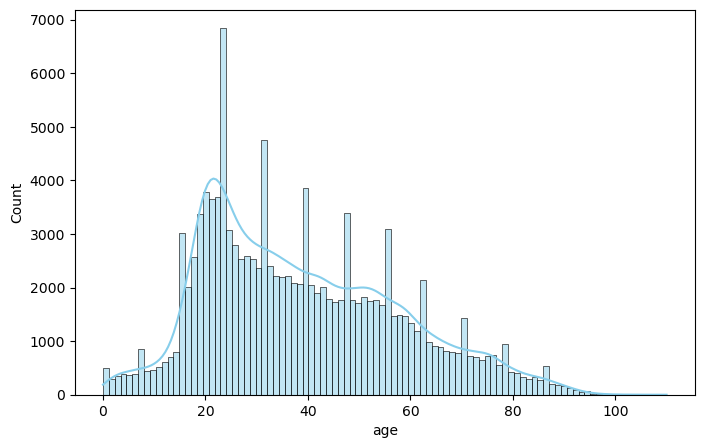

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

# Impute missing ages by random sampling from existing non-null ages
final_table['age'] = final_table['age'].apply(
    lambda x: np.random.choice(final_table['age'].dropna()) if pd.isnull(x) else x
)

# Adjust column data type
final_table['age'] = final_table['age'].astype(int)

# Check if it worked as expected
print("Number of NaNs: ", final_table['age'].isna().sum() / len(final_table) * 100)
print(final_table['age'].describe())

plt.figure(figsize=(8,5))
sns.histplot(final_table['age'], kde=True, color='skyblue')


In [9]:
# Now look at vehicle data

cols_vehicle = final_table.iloc[:, 47:57]
display(cols_vehicle.head())

,number_vehicle,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport,impact_score
0,A01,1.0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,NaN,3.0
1,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0
4,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0


In [10]:
info = pd.DataFrame({
    'Column': cols_vehicle.columns,
    'Data Type': [cols_vehicle[col].dtype for col in cols_vehicle.columns],
    'Missing %': [f"{cols_vehicle[col].isna().sum() / len(cols_vehicle) * 100}%" for col in cols_vehicle.columns],
    'Unique Values': [cols_vehicle[col].nunique() for col in cols_vehicle.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,number_vehicle,object,7.569024318501618%,46
1,direction_of_travel,float64,7.67237198801167%,4
2,vehicle_category,object,7.571409264721081%,6
3,fixed_obstacle_struck,float64,7.626263027768723%,18
4,mobile_obstacle_struck,float64,7.611953350451947%,7
5,initial_point_of_impact,float64,7.62546804569557%,10
6,main_maneuver_before_accident,float64,7.604798511793559%,27
7,motor_type,float64,7.731995643498239%,7
8,number_occupants_in_public_transport,float64,98.59844660502905%,26
9,impact_score,float64,7.569024318501618%,6


In [11]:
# Drop columns
final_table.drop([
    'number_vehicle',
    'direction_of_travel',
    'number_occupants_in_public_transport',
    ], axis=1, inplace=True)

In [12]:
cols_of_interest = cols_vehicle.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category:
light_motor_vehicle    80458
powered_2_3_wheeler    20318
NaN                     9524
bicycle                 5958
other                   4999
hgv_truck               2769
bus_coach               1763
Name: vehicle_category, dtype: int64

fixed_obstacle_struck:
0.0     96254
NaN      9593
1.0      2697
13.0     2628
2.0      2300
4.0      2021
3.0      1849
6.0      1673
8.0      1589
12.0     1084
14.0      876
15.0      720
16.0      663
9.0       629
7.0       439
5.0       243
11.0      207
10.0      178
17.0      146
Name: fixed_obstacle_struck, dtype: int64

mobile_obstacle_struck:
2.0    80751
0.0    24364
NaN     9575
1.0     8942
9.0     1765
6.0      172
4.0      118
5.0      102
Name: mobile_obstacle_struck, dtype: int64

initial_point_of_impact:
1.0    41867
3.0    17475
2.0    14466
4.0    11562
NaN     9592
8.0     8004
0.0     6835
7.0     6582
6.0     4079
5.0     3384
9.0     1943
Name: initial_point_of_impact, dtype: int64

main_maneuver_before_acc

Now it's time to clean the columns:

In [13]:
from clean_vehicle_data import impute_nans_own_vehicle

final_table = impute_nans_own_vehicle(final_table)    
display(final_table.head())

#for col in cols_of_interest.columns:
#    if(final_table[col].dtype == float):
#        final_table[col] = final_table[col].astype(int)

c:\Users\lukas\Data_Mining\Data_Mining_I_Project\exploration\Lukas\clean_vehicle_data.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_category'] = np.where((df['vehicle_category'].isna()) & (df['role'] == 'pedestrian'), 'none', df['vehicle_category'])#np.where((df['vehicle_category'].isna()) & (df['role'] != "pedestrian"), "unknown", df['vehicle_category']))


TypeError: dropna() got an unexpected keyword argument 'susbset'

Look at the columns again:

In [ ]:
cols_of_interest = cols_vehicle.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category:
light_motor_vehicle    80380
powered_2_3_wheeler    20297
none                    9521
bicycle                 5948
other                   4985
hgv_truck               2765
bus_coach               1763
unknown                    3
Name: vehicle_category, dtype: int64

fixed_obstacle_struck:
 0.0     96211
-1.0      9521
 1.0      2692
 13.0     2627
 2.0      2299
 4.0      2021
 3.0      1848
 6.0      1673
 8.0      1587
 12.0     1083
 14.0      876
 15.0      719
 16.0      663
 9.0       629
 7.0       439
 5.0       243
 11.0      207
 10.0      178
 17.0      146
Name: fixed_obstacle_struck, dtype: int64

mobile_obstacle_struck:
 2.0    80717
 0.0    24337
-1.0     9521
 1.0     8930
 9.0     1765
 6.0      172
 4.0      118
 5.0      102
Name: mobile_obstacle_struck, dtype: int64

initial_point_of_impact:
 1.0    41837
 3.0    17468
 2.0    14464
 4.0    11559
-1.0     9521
 8.0     8002
 0.0     6828
 7.0     6581
 6.0     4077
 5.0     3383
 9.0     1942
Na

Both fixed_obstacle_struck and mobile_obstacle_struck now have a lot of 0 or -1, which corresponds to no obstacle. It is worth exploring if it would be of benefit to merge the two columns:

In [ ]:
percentage_one_obstacle = len(final_table[(final_table["fixed_obstacle_struck"]==0) | (final_table["mobile_obstacle_struck"]==0) | (final_table["fixed_obstacle_struck"]==-1) | (final_table["mobile_obstacle_struck"]==-1)]) / len(final_table)
print(f"{percentage_one_obstacle*100:.2f} percent of accidents have one or no obstacle.")

96.19 percent of accidents have one or no obstacle.


I suggest keeping the two obstacle columns. This is because the model should clearly differentiate between fixed and mobile obstacles. On top of that, around 4% of accidents involve both types of obstacles. For these cases it would be also not good to merge the two columns. 

In [ ]:
# Now look at the other vehicle
cols_other = final_table.iloc[:, 54:]
display(cols_other.head())

,id_vehicle_other,number_vehicle_other,direction_of_travel_other,vehicle_category_other,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,number_occupants_in_public_transport_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,155680556.0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,0,0,0,1,0,0
3,155680555.0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,0,0,0,1,0,1
4,155680554.0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,0,0,0,1,0,1


In [ ]:
info = pd.DataFrame({
    'Column': cols_other.columns,
    'Data Type': [cols_other[col].dtype for col in cols_other.columns],
    'Missing %': [f"{cols_other[col].isna().sum() / len(cols_other) * 100}%" for col in cols_other.columns],
    'Unique Values': [cols_other[col].nunique() for col in cols_other.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,id_vehicle_other,float64,21.089907848036795%,76495
1,number_vehicle_other,object,21.089907848036795%,41
2,direction_of_travel_other,float64,21.16869061450558%,4
3,vehicle_category_other,object,21.093090990116345%,6
4,fixed_obstacle_struck_other,float64,21.131288695070904%,18
5,mobile_obstacle_struck_other,float64,21.109006700514076%,7
6,initial_point_of_impact_other,float64,21.124126625391924%,10
7,main_maneuver_before_accident_other,float64,21.11855612675272%,27
8,motor_type_other,float64,21.228374528497078%,7
9,number_occupants_in_public_transport_other,float64,99.13577692540306%,24


In [ ]:
# To better distinguish cases bwtween the presence of another car and no other car, add an extra binary column
final_table['other_vehicle'] = final_table['id_vehicle_other'].notna().astype(int)

In [ ]:
# Drop columns
final_table.drop([
    'id_vehicle_other',
    'number_vehicle_other',
    'direction_of_travel_other',
    'fixed_obstacle_struck_other',
    'mobile_obstacle_struck_other',
    'number_occupants_in_public_transport_other'
], axis=1, inplace=True)

In [ ]:
cols_of_interest = cols_other.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category_other:
light_motor_vehicle    68858
NaN                    26506
powered_2_3_wheeler    15561
bicycle                 5461
hgv_truck               4096
other                   4094
bus_coach               1086
Name: vehicle_category_other, dtype: int64

initial_point_of_impact_other:
1.0    36130
NaN    26545
3.0    15619
2.0    12140
4.0    10844
8.0     6886
7.0     5359
0.0     4366
6.0     4162
5.0     3132
9.0      479
Name: initial_point_of_impact_other, dtype: int64

main_maneuver_before_accident_other:
1.0     40691
NaN     26538
2.0     12677
15.0     8385
0.0      5751
13.0     4384
17.0     3154
9.0      2973
23.0     2709
19.0     2630
16.0     2556
26.0     2289
5.0      1603
11.0     1295
21.0     1251
12.0     1240
3.0      1029
14.0      905
10.0      713
20.0      556
4.0       501
24.0      477
18.0      462
22.0      309
25.0      242
7.0       171
6.0       144
8.0        27
Name: main_maneuver_before_accident_other, dtype: int64

motor_type_other:


Clean the data now

In [ ]:
from clean_vehicle_data import impute_nans_other_vehicle

# Handle missing values (Descriptions in the function)
final_table = impute_nans_other_vehicle(final_table)    
display(final_table.head())

# Adjust data types
#for col in cols_of_interest.columns:
#    if(final_table[col].dtype == float):
#        final_table[col] = final_table[col].astype(int)

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,pavement_condition,infrastructure,accident_situation,speed_limit,position,user_category,injury_severity,sex,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,impact_score,vehicle_category_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,other_vehicle
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,2,0,1,30,1,1,4,1,-1,-1,-1,driver,45,0,1,0,0,0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,3.0,none,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,1,1,1,2,-1,-1,-1,driver,26,1,0,0,0,0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,4.0,none,-1.0,-1.0,-1.0,-1.0,0,0,0,1,0,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,10,3,3,1,2,3,1,pedestrian,26,0,0,0,0,0,none,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,light_motor_vehicle,1.0,1.0,1.0,4.0,0,0,0,1,0,0,1
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,3,1,0,0,-1,driver,36,0,1,0,0,0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,3.0,light_motor_vehicle,2.0,15.0,1.0,4.0,0,0,0,1,0,1,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,1,2,0,0,-1,driver,39,1,0,0,0,0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,4.0,powered_2_3_wheeler,1.0,16.0,1.0,3.0,0,0,0,1,0,1,1


In [ ]:
for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category_other:
light_motor_vehicle    68829
none                   26502
powered_2_3_wheeler    15559
bicycle                 5459
hgv_truck               4096
other                   4086
bus_coach               1086
unknown                    2
Name: vehicle_category_other, dtype: int64

initial_point_of_impact_other:
 1.0    36130
-1.0    26502
 3.0    15619
 2.0    12140
 4.0    10844
 8.0     6886
 7.0     5359
 0.0     4366
 6.0     4162
 5.0     3132
 9.0      479
Name: initial_point_of_impact_other, dtype: int64

main_maneuver_before_accident_other:
 1.0     40679
-1.0     26502
 2.0     12676
 15.0     8384
 0.0      5766
 13.0     4384
 17.0     3154
 9.0      2973
 23.0     2707
 19.0     2626
 16.0     2555
 26.0     2289
 5.0      1603
 11.0     1295
 21.0     1251
 12.0     1240
 3.0      1029
 14.0      905
 10.0      712
 20.0      556
 4.0       501
 24.0      477
 18.0      462
 22.0      309
 25.0      242
 7.0       171
 6.0       144
 8.0        27
Name: m

In [ ]:
# Display final table
display(final_table.head())